In [125]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import random
import matplotlib.pyplot as plt

# 1.Generating random points

In [126]:
points=np.random.rand(1000,2)*100

In [127]:
points

array([[87.57870669, 15.12744675],
       [79.70875695, 28.60444673],
       [83.22636077, 73.22998783],
       ...,
       [70.67202276, 91.84794506],
       [ 6.83672838, 87.17816638],
       [82.78499367, 67.30184614]])

In [128]:
df=pd.DataFrame(points)
df

,0,1
0,87.578707,15.127447
1,79.708757,28.604447
2,83.226361,73.229988
3,28.686161,22.238926
4,80.077890,78.526821
...,...,...
995,61.522483,34.566826
996,27.775440,64.926293
997,70.672023,91.847945
998,6.836728,87.178166


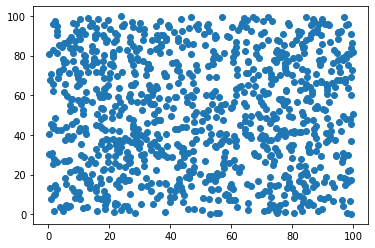

In [129]:
x,y=zip(*points)

plt.scatter(x,y)
plt.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


# 2.Simple linear regression from scratch

In [131]:
x=df.iloc[:,0]
y=df.iloc[:,0]

In [132]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [133]:
n=len(x)
numer=0
denom=0
for i in range(n):
        numer+=(x[i]-mean_x)*(y[i]-mean_y)
        denom+=(x[i]-mean_x)**2

m=numer/denom
c=mean_y-(m*mean_x)

print(f'm={m} \nc={c}')

m=1.0 
c=0.0


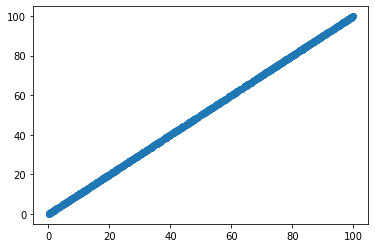

In [134]:
pred_y=m*x+c
plt.scatter(x,y)
plt.plot(x,pred_y)

# 3.Gradient descent

In [135]:
rate=0.05
iterate=5000
n=float(1000)

In [136]:
for i in range(iterate):
    pred_y=m*x+c
    derv_m=(-2/n)*m
    derv_c=(-2/n)*c
    
print(derv_m)
print(derv_c)

-0.002
-0.0


# 4.applying sklearn

In [137]:
s=pd.DataFrame(df[0])
w=pd.DataFrame(df[1])

from sklearn.linear_model import LinearRegression
l=LinearRegression()

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(s,w, test_size = 0.1 )
l.fit(x_train,y_train)
y_pred_new= l.predict(x_test)

In [138]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred_new))

28.507140838180753

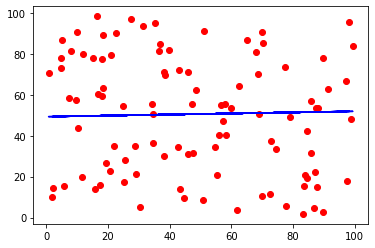

In [139]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test, c='r')
plt.plot(x_test,y_pred_new, c='b')